In [1]:
import numpy as np
import pandas as pd

import folium
import geopandas as gpd

c:\softwares\python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df_covid = pd.read_csv('./complete.csv')
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


36


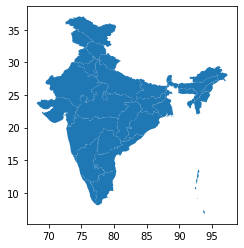

In [13]:
india_geojson = gpd.read_file('./india.json')
india_geojson = india_geojson.dissolve(by='st_nm')

print(len(india_geojson))
india_geojson.head()
india_geojson.plot()

In [16]:
df_covid['Date'] = pd.to_datetime(df_covid['Date']).apply(lambda x: x - pd.DateOffset(days=1))
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [23]:
len(df_covid['Name of State / UT'].unique())

38

In [29]:
df_covid['Name of State / UT'].replace('Telengana', 'Telangana', inplace=True)
df_covid['Name of State / UT'].replace('Telangana***', 'Telangana', inplace=True)
df_covid['Name of State / UT'].replace('Union Territory of Ladakh', 'Ladakh', inplace=True)
df_covid['Name of State / UT'].replace('Union Territory of Jammu and Kashmir', 'Jammu and Kashmir', inplace=True)

print(len(df_covid['Name of State / UT'].unique()))
df_covid['Name of State / UT'].unique()

36


array(['Kerala', 'Delhi', 'Telangana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Ladakh', 'Karnataka',
       'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar',
       'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa',
       'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland'],
      dtype=object)

In [30]:
id_dict={'Andaman and Nicobar Islands': '0',
         'Arunachal Pradesh': '1',
         'Assam': '2',
         'Bihar': '3',
         'Chandigarh': '4',
         'Chhattisgarh': '5',
         'Dadra and Nagar Haveli': '6',
         'Daman and Diu': '7',
         'Goa': '8',
         'Gujarat': '9',
         'Haryana': '10',
         'Himachal Pradesh': '11',
         'Jharkhand': '12',
         'Karnataka': '13',
         'Kerala': '14',
         'Lakshadweep': '15',
         'Madhya Pradesh': '16',
         'Maharashtra': '17',
         'Manipur': '18',
         'Meghalaya': '19',
         'Mizoram': '20',
         'Nagaland': '21',
         'Delhi': '22',
         'Puducherry': '23',
         'Punjab': '24',
         'Rajasthan': '25',
         'Sikkim': '26',
         'Tamil Nadu': '27',
         'Telangana': '28',
         'Tripura': '29',
         'Uttar Pradesh': '30',
         'Uttarakhand': '31',
         'West Bengal': '32',
         'Odisha': '33',
         'Andhra Pradesh': '34',
         'Jammu and Kashmir': '35',
         'Ladakh': '36'}

df_covid['state_id']=df_covid['Name of State / UT'].map(id_dict)
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,state_id
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0,14
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0,14
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0,14


In [36]:
df_covid['Active Cases']  = df_covid['Total Confirmed cases'] - (df_covid['Cured/Discharged/Migrated'] + df_covid['Death'].replace('0#', '0').astype(float))

df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,state_id,Active Cases
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14,1.0
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14,1.0
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0,14,2.0
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0,14,3.0
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0,14,3.0


In [37]:
bins=np.linspace(min(df_covid['Active Cases']),max(df_covid['Active Cases']),11)
bins

array([     0. ,  15096.6,  30193.2,  45289.8,  60386.4,  75483. ,
        90579.6, 105676.2, 120772.8, 135869.4, 150966. ])

In [38]:
# Coloring states and UTs with active COVID-19 cases
df_covid['color']=pd.cut(df_covid['Active Cases'],bins,labels=['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'],include_lowest=False)

# Coloring states and UTs with no active cases but previously had
df_covid['color'].replace(np.nan,'#32CD32',inplace=True)

In [39]:
df_covid=df_covid[['Date','state_id','color']]

df_covid.head()

,Date,state_id,color
0,2020-01-29,14,#FFEBEB
1,2020-01-30,14,#FFEBEB
2,2020-01-31,14,#FFEBEB
3,2020-02-01,14,#FFEBEB
4,2020-02-02,14,#FFEBEB


In [40]:
for date in df_covid['Date'].unique():
    diff=set([str(i) for i in range(37)])-set(df_covid[df_covid['Date']==date]['state_id'])
    for i in diff:
        df_covid=pd.concat([df_covid,pd.DataFrame([[date,'#0073CF',i]],columns=['Date','color','state_id'])],ignore_index=True)

df_covid.sort_values('Date',inplace=True)

In [41]:
df_covid['Date']=(df_covid['Date'].astype(int)// 10**9).astype('U10')

covid_dict={}

for i in df_covid['state_id'].unique():
    covid_dict[i]={}
    for j in df_covid[df_covid['state_id']==i].set_index(['state_id']).values: 
        covid_dict[i][j[0]]={'color':j[1],'opacity':0.7}

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [int32]